In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, BatchNormalization, MaxPool2D
from tensorflow.keras import Model

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

5


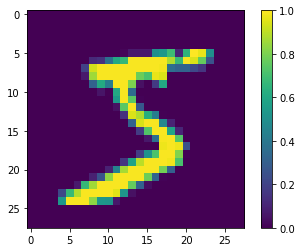

In [4]:
print(y_train[0])

plt.imshow(x_train[0, :, :])
plt.colorbar()

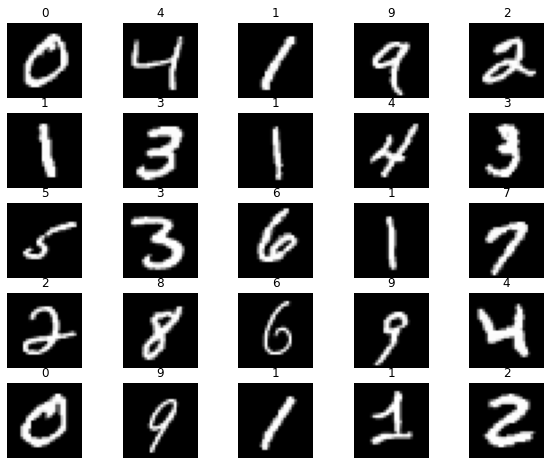

In [5]:
num = 26
imgs = x_train[:num]
lbls = y_train[:num]
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.title(lbls[i])
    plt.axis("off")
    plt.imshow(imgs[i], cmap='gray')
plt.show()

In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(64)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

In [7]:
train_ds, test_ds

(<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.uint8)>,
 <BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.uint8)>)

In [8]:
model = tf.keras.Sequential([
    Conv2D(32, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10)
])


# input_ = Input(shape=(28, 28, 1))
# x = input_

# for i in range(5):
#     n_filters = 2**(4+i)
#     x = Conv2D(n_filters, 3, activation='relu')(x)
#     x = BatchNormalization()(x)
#     x = MaxPool2D(2)(x)
    
# x = Flatten()(x)
# x = Dense(256, activation='relu')(x)
# model = tf.keras.models.Model(input_)

In [9]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [10]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_acc = tf.keras.metrics.Accuracy(name='train_acc')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_acc = tf.keras.metrics.Accuracy(name='test_acc')

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_ds, epochs=10)
# model.fit(x_train, y_train, epochs=2)

Epoch 1/10
938/938 [==============================] - 14s 9ms/step - loss: 0.2770 - accuracy: 0.9153
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0449 - accuracy: 0.9860
Epoch 3/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0257 - accuracy: 0.9923
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0164 - accuracy: 0.9949
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0121 - accuracy: 0.9959
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0082 - accuracy: 0.9974
Epoch 7/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0084 - accuracy: 0.9970
Epoch 8/10
938/938 [==============================] - 9s 9ms/step - loss: 0.0070 - accuracy: 0.9974
Epoch 9/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 10/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0048 - accuracy: 0.998

In [13]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc)

157/157 - 1s - loss: 0.0455 - accuracy: 0.9905

Test accuracy: 0.9904999732971191


In [14]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
preds = probability_model.predict(test_ds)

In [15]:
y_test[0], preds[0]

(7,
 array([7.2497442e-12, 5.4337472e-11, 4.8578042e-13, 2.3786100e-11,
        2.3792950e-11, 2.1424605e-12, 6.5250824e-20, 1.0000000e+00,
        2.1361796e-13, 6.2538592e-11], dtype=float32))

In [16]:
preds[1].argmax(), y_test[1]
tuple(map(np.argmax, preds))

(7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 5,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [17]:
preds.shape

(10000, 10)

In [18]:
lbls

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2], dtype=uint8)

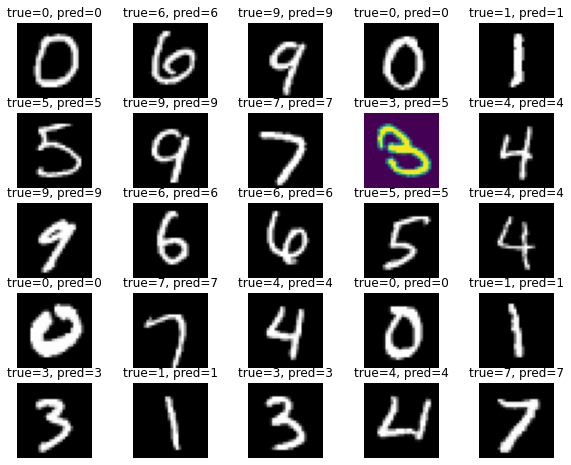

In [19]:
num = 9
imgs = x_test[num:num+26]
# lbls = y_test[num:num+26]
# lbls = tuple(map(np.argmax, preds))
lbls = (y_test[num:num+26], tuple(map(np.argmax, preds))[num:num+26])
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
#     plt.title(lbls[i])
    plt.title(f'true={lbls[0][i]}, pred={lbls[1][i]}')
    plt.axis("off")
    cmap_ = 'gray' if lbls[0][i]==lbls[1][i] else 'viridis'
    plt.imshow(imgs[i], cmap=cmap_)
plt.show()

## Custom images

In [42]:
from PIL import Image
import os

In [47]:
for i in range(9, 10):
    image = Image.open(os.path.join('mnist_custom', f'{i}.jpg'))
    image.thumbnail((28, 28), Image.ANTIALIAS)
    image.save(os.path.join('mnist_custom', f'{i}.jpg'), 'JPEG')